In [1]:
# Import tree class and create object
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [2]:
# minimalistic dataset
X = [[0, 0], [1, 1]]
y = [0, 1]

In [3]:
# training the tree
clf = clf.fit(X, y)

In [4]:
# Predict 
clf.predict([[2., 2.]])

array([1])

In [5]:
# Now let's use Iris dataset
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [7]:
from scipy import stats
stats.describe(X)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [14]:
import numpy as np
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

[Text(133.92000000000002, 195.696, 'X[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(234.36, 65.232, 'X[1] <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267

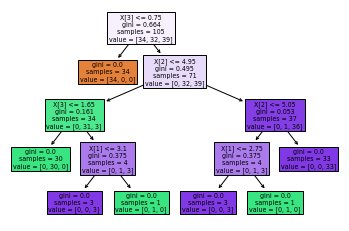

In [35]:
tree.plot_tree(clf, filled=True)

In [36]:
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, filled=True)

In [37]:
# predict test set
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [38]:
# calculate the score
clf.score(X_test, y_test)

0.9777777777777777

[Text(125.55000000000001, 190.26, 'X[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.4, 135.9, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.45\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 21\nvalue = [0, 21, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.355\nsamples = 13\nvalue = [0, 10, 3]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 5.25\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(209.25, 27.180000000000007, 'gini = 0.165\nsamples = 11\nvalue = [0, 1, 10]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]')]

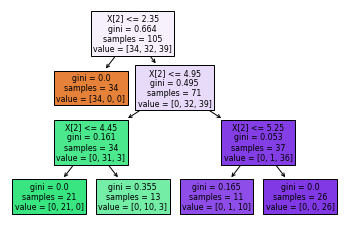

In [39]:
# Changing hyperparam of tree
clf2 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
clf2 = clf2.fit(X_train, y_train)
tree.plot_tree(clf2, filled=True)

In [40]:
# predict test set
clf2.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [41]:
# calculate the score
clf2.score(X_test, y_test)

0.9111111111111111

In [90]:
tuned_parameters = {'max_depth': [1, 2, 3, 4, 5, 6],
                    'min_samples_leaf': [1, 5, 10, 15, 20, 35, 50]}

In [91]:
# Now we will gridsearch the parameters
from sklearn.model_selection import GridSearchCV
clf3 = GridSearchCV(tree.DecisionTreeClassifier(), tuned_parameters, cv=2)

In [100]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, train_size=0.05, random_state=0)

In [101]:
clf3 = clf3.fit(X_train3, y_train3)

/home/jeslava/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
/home/jeslava/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [102]:
clf3_best = clf3.best_estimator_

In [103]:
clf3_best.score(X_test3, y_test3)

0.8881118881118881

[Text(133.92000000000002, 181.2, 'X[2] <= 2.8\ngini = 0.571\nsamples = 7\nvalue = [4, 1, 2]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.4\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]')]

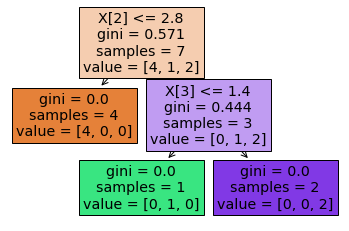

In [105]:
tree.plot_tree(clf3_best, filled=True)

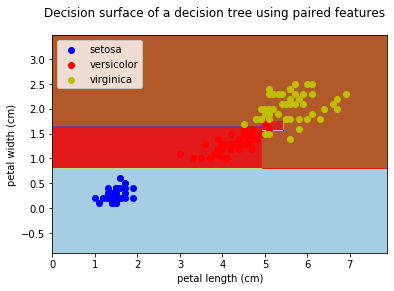

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# Choisir les attributs longueur et largeur des pétales
pair = [2, 3]

# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target

# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)

# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [1]:
# Decision tree for regresion:

In [2]:
from sklearn import tree

X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

# Training dataset
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
plt.plot(X, y)
plt.title("Signal sinusoïdal pur")

# random noise every 5 samples
y[::5] += 3 * (0.5 - np.random.rand(16))
fig.add_subplot(122)
plt.plot(X, y)
plt.title("Signal sinusoïdal bruité")

Text(0.5, 1.0, 'Signal sinusoïdal bruité')

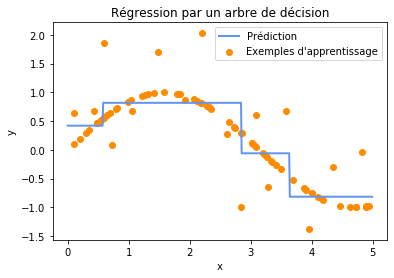

In [4]:
# Train the model
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X, y)

# Predict  values
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)

# Display results
plt.figure()
plt.scatter(X, y, c="darkorange", label="Exemples d'apprentissage")
plt.plot(X_test, y_pred, color="cornflowerblue", label="Prédiction", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression par un arbre de décision")
plt.legend()
plt.show()